In [26]:
#thư viện keras cho mạng tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout, Activation
#dataset
from keras.datasets import mnist
#thư viện phụ trợ cho codecode
import numpy as np

In [27]:
#load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [28]:
#chia 50000 data train cho tập train và 100000 data cho tập valid
X_valid, Y_valid = X_train[50000:60000,:,:], Y_train[50000:60000]
X_train, Y_train = X_train[:50000,:,:], Y_train[:50000]

In [29]:
#thay đổi kích thước lại cho đúng đầu vào của models CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# chia cho 255 

In [30]:
#one hot encoding (Y)
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 10)
Y_valid = np_utils.to_categorical(Y_valid, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [31]:
#tạo model
model = Sequential()

In [32]:
#thêm Conv với 32 kernel 3*3, stride = 1, padding = 1, activation = sigmod
model.add(Conv2D(32, (3*3), padding="same", activation='relu', input_shape=(28,28,1)))

In [33]:
model.add(BatchNormalization())

In [34]:
#thêm Conv với 32 kernel 3*3, stride = 1, padding = 1, activation = sigmod
model.add(Conv2D(32, (3*3), padding="same", activation='relu'))

In [35]:
model.add(BatchNormalization())

In [36]:
#thêm Polling 2*2
model.add(MaxPooling2D((2,2)))

In [37]:
#chuyển thành input layer của FCN
model.add(Flatten())

In [38]:
#thêm hidden layer với 128 node
model.add(Dense(128, activation="relu"))

In [39]:
#đầu ra ouput layer với 10 node tương ứng với 10 chữ số
model.add(Dense(10, activation="softmax"))

In [40]:
#tạo compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        82976     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [42]:
H = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1463 - acc: 0.9584 - val_loss: 0.0799 - val_acc: 0.9761
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0550 - acc: 0.9838 - val_loss: 0.1153 - val_acc: 0.9674
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0515 - val_acc: 0.9870
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0311 - acc: 0.9907 - val_loss: 0.0512 - val_acc: 0.9869
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0257 - acc: 0.9924 - val_loss: 0.0496 - val_acc: 0.9872
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0231 - acc: 0.9929 - val_loss: 0.0505 - val_acc: 0.9887
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0177 - acc: 0.9948 - val_loss: 0.0598 - val_acc: 0.9862
Epoch 8/10
782/782 [==============================] - 12s 15ms

In [43]:
model.save("classify_number_ver2.h5")

In [44]:
#gọi thư viện plt để vẽ biểu đồ
import matplotlib.pyplot as plt

In [45]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [46]:
epochs = 10

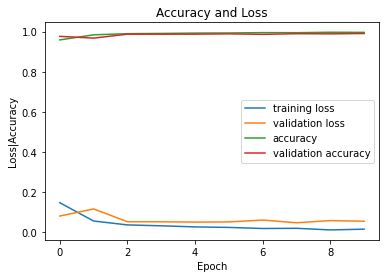

In [47]:
plt.plot(np.arange(0, epochs), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epochs), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epochs), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, epochs), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0429079607129097, 0.9904999732971191]
